# KNN

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951. The input consists of the k closest training examples in data set. The output depends on whether k-NN is used for classification or regression:

* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then **normalizing the training data can improve its accuracy dramatically**.

For **high-dimensional data (e.g., with number of dimensions more than 10) dimension reduction is usually performed prior to applying the k-NN algorithm** in order to avoid the effects of the curse of dimensionality. Dimension reduction could be done using principal component analysis (PCA), linear discriminant analysis (LDA).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#k-NN---K-Nearest-Neighbors-for-classification" data-toc-modified-id="k-NN---K-Nearest-Neighbors-for-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>k-NN - K-Nearest Neighbors for classification</a></span></li><li><span><a href="#k-NN---K-Nearest-Neighbors-for-regression" data-toc-modified-id="k-NN---K-Nearest-Neighbors-for-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>k-NN - K-Nearest Neighbors for regression</a></span></li><li><span><a href="#kNN-from-scratch---force-brut" data-toc-modified-id="kNN-from-scratch---force-brut-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>kNN from scratch - force brut</a></span><ul class="toc-item"><li><span><a href="#Define-the-dataset" data-toc-modified-id="Define-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Define the dataset</a></span></li><li><span><a href="#Step-1:-Calculate-Euclidean-Distance" data-toc-modified-id="Step-1:-Calculate-Euclidean-Distance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Step 1: Calculate Euclidean Distance</a></span></li><li><span><a href="#Get-Nearest-Neighbors" data-toc-modified-id="Get-Nearest-Neighbors-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get Nearest Neighbors</a></span></li><li><span><a href="#Step-3:-Make-Predictions" data-toc-modified-id="Step-3:-Make-Predictions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Step 3: Make Predictions</a></span></li><li><span><a href="#Cost-of-these-approach" data-toc-modified-id="Cost-of-these-approach-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Cost of these approach</a></span></li></ul></li><li><span><a href="#The-lab-for-today:-use-KNN-for-missing-values-imputation" data-toc-modified-id="The-lab-for-today:-use-KNN-for-missing-values-imputation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The lab for today: use KNN for missing values imputation</a></span><ul class="toc-item"><li><span><a href="#Traditional-imputing-with-sklearn" data-toc-modified-id="Traditional-imputing-with-sklearn-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Traditional imputing with sklearn</a></span><ul class="toc-item"><li><span><a href="#First-execution-in-order-to-test-the-pipeline" data-toc-modified-id="First-execution-in-order-to-test-the-pipeline-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>First execution in order to test the pipeline</a></span></li></ul></li></ul></li><li><span><a href="#Approximate-Nearest-Neighbors" data-toc-modified-id="Approximate-Nearest-Neighbors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Approximate Nearest Neighbors</a></span></li></ul></div>

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## k-NN - K-Nearest Neighbors for classification

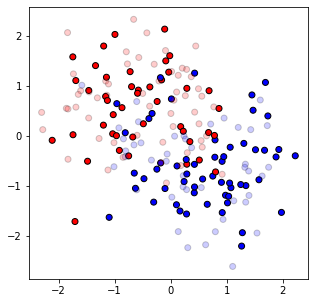

In [4]:
''' define the dataset '''
from sklearn.datasets import make_moons

# Define dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

# Plot the training and testing points
plt.figure(figsize=(5, 5))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.2)
plt.show()

In [5]:
''' Build and use classifier '''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=7, p=2)
# p: power parameter for the Minkowski metric.
# p = 1 --> manhattan_distance (l1)
# p = 2 --> euclidean_distance (l2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# With 2 classes of the same size, accuracy can be used
accuracy_score(y_test, y_pred)

0.8

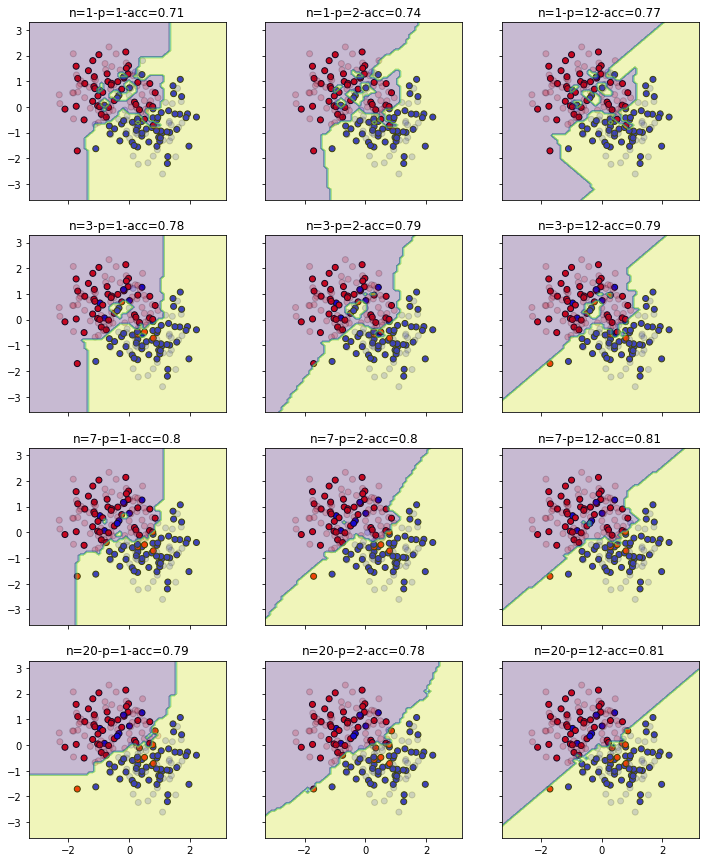

In [6]:
''' Plot the decision regions with different neighbors and distance '''
# change the number of neighbors
n_neighbors = [1, 3, 7, 20]
n_power = [1, 2, 12]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(len(n_neighbors), len(n_power), sharex='col', sharey='row', figsize=((len(n_power)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, power in enumerate(n_power):
        clf = KNeighborsClassifier(n_neighbors=neighbors, p=power)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cm_bright, edgecolors='k', alpha=0.2)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i, j].contourf(xx, yy, Z, alpha=0.3)
        ax[i, j].set_title("n="+str(neighbors)+"-p="+str(power)+"-acc="+str(accuracy_score(y_test, y_pred)))
plt.show()

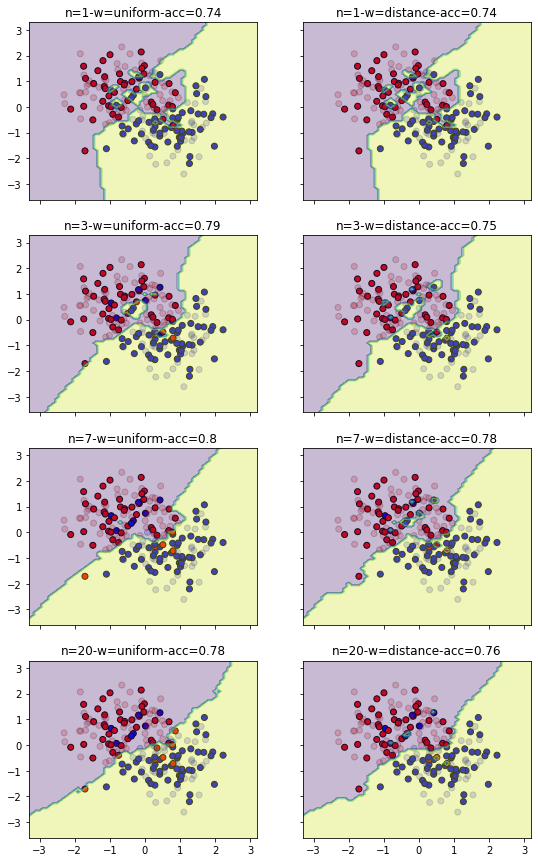

In [7]:
''' Plot the decision regions with different neighbors and weigthed '''
# change the number of neighbors
n_neighbors = [1, 3, 7, 20]
power = 2
n_weights = ['uniform', 'distance']

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(len(n_neighbors), len(n_weights), sharex='col', sharey='row', figsize=((len(n_weights)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, weights in enumerate(n_weights):
        clf = KNeighborsClassifier(n_neighbors=neighbors, p=power, weights=weights)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cm_bright, edgecolors='k', alpha=0.2)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i, j].contourf(xx, yy, Z, alpha=0.3)
        ax[i, j].set_title("n="+str(neighbors)+"-w="+str(weights)+"-acc="+str(accuracy_score(y_test, y_pred)))
plt.show()

## k-NN - K-Nearest Neighbors for regression

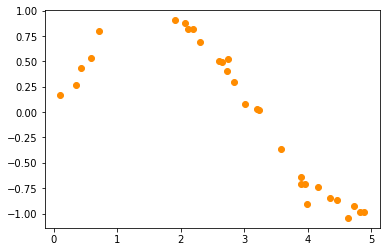

In [8]:
from sklearn.datasets import make_regression

# Define dataset
nb_items = 30
np.random.seed(0)
X_train = np.sort(5 * np.random.rand(nb_items, 1), axis=0)
y_train = np.sin(X_train).ravel() + 0.3*(0.5 - np.random.rand(nb_items))*(np.random.rand(nb_items)<0.7)

X_test = np.linspace(0, 5, 500)[:, np.newaxis]

# Plot the training and testing points
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.show()

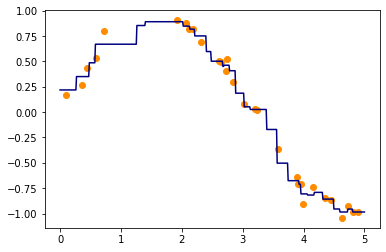

In [9]:
from sklearn.neighbors import KNeighborsRegressor

weights='uniform'
n_neighbors = 2
knn = KNeighborsRegressor(n_neighbors, weights=weights, p=2)
y_ = knn.fit(X_train, y_train).predict(X_test)
y_pred = knn.predict(X_test)

plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', label='prediction')
plt.show()

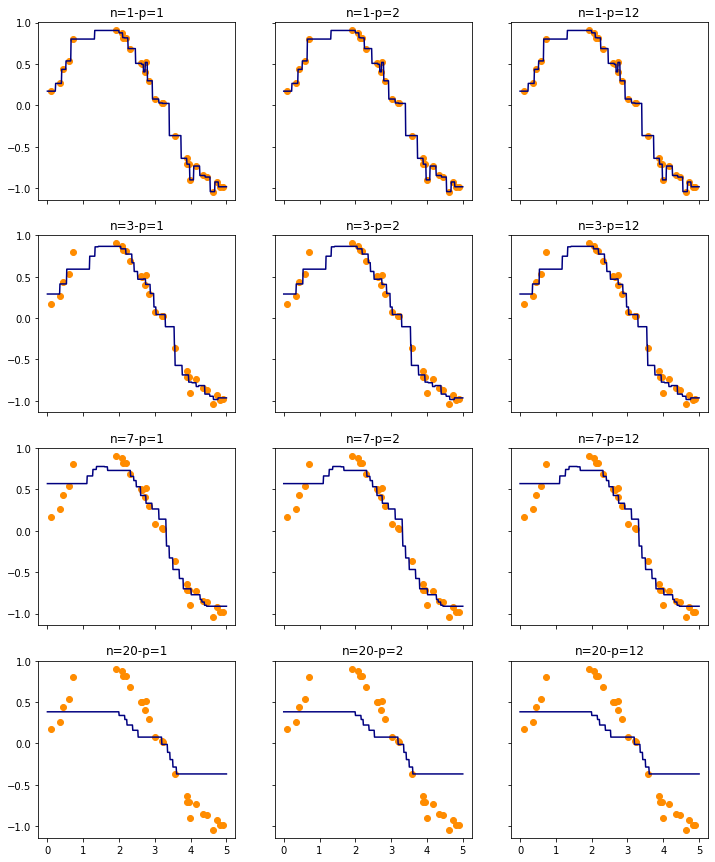

In [10]:
n_neighbors = [1, 3, 7, 20]
n_power = [1, 2, 12]

fig, ax = plt.subplots(len(n_neighbors), len(n_power), sharex='col', sharey='row', figsize=((len(n_power)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, power in enumerate(n_power):
        clf = KNeighborsRegressor(n_neighbors=neighbors, p=power)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        ax[i, j].scatter(X_train, y_train, color='darkorange', label='data')
        ax[i, j].plot(X_test, y_pred, color='navy', label='prediction')
        ax[i, j].set_title("n="+str(neighbors)+"-p="+str(power))
plt.show()

## The lab for today: use KNN for missing values imputation

The [horse colic dataset](https://archive.ics.uci.edu/ml/datasets/Horse+Colic) describes medical characteristics of horses with colic and whether they lived or died.

The data is supplied in two files. The first contains 300 horse
colic cases that should be used for training data while the second contains
68 cases that can be used for testing the performance of your method.

The variable that we have tended to try and predict is:
* V23: what eventually happened to the horse? (1 = lived, 2 = died, 3 = was euthanized)
* V24, surgical lesion? retrospectively, was the problem (lesion) surgical? All cases are either operated upon or autopsied so that this value and the lesion type are always known (1 = Yes, 2 = No)
* V25, V26, V27: type of lesion coded on 4 digits
* V28:  is pathology data present for this case? (1 = Yes, 2 = No)

The sample contains approx. 30% missing values (indicated by a zero in the
data provided). You will need to deal with all types of variables (continuous,
discrete, and nominal) as well as the missing values in your method.

The dataset has many missing values for many of the columns where each missing value is marked with a question mark character (“?”).

In [11]:
# load dataset
url = "https://www.i3s.unice.fr/~riveill/dataset/"

def read_dataset(url, name):
    dataframe = pd.read_csv(url+name, header=None, sep=";",
                        na_values='?', error_bad_lines=False)
    mapper = {}
    for old, new in zip(dataframe.columns, ["V"+str(i+1) for i in dataframe.columns]):
        mapper[old] = new
    dataframe = dataframe.rename(mapper, axis=1)

    dataframe['V1'] = (dataframe['V1']==1.0) # Surgery ?
    dataframe['V2'] = (dataframe['V2']==1) # Adult ?
    dataframe['V3'] = dataframe['V3'].astype('category') # Hospital number
    # dataframe['V4'], rectal temperature
    # dataframe['V5'], heart pulse
    # dataframe['V6'], respirtory rate
    dataframe['V7'] = dataframe['V7'].astype('category') # temperature of extremities
    dataframe['V8'] = dataframe['V8'].astype('category') # peripheral pulse
    dataframe['V9'] = dataframe['V9'].astype('category') # mucous membranes
    dataframe['V10'] = dataframe['V10'].astype('category') # capillary refill time
    dataframe['V11'] = dataframe['V11'].astype('category') # pain
    dataframe['V12'] = dataframe['V12'].astype('category') # peristalsis
    dataframe['V13'] = dataframe['V13'].astype('category') # abdominal distension
    dataframe['V14'] = dataframe['V14'].astype('category') # nasogastric tube
    dataframe['V15'] = dataframe['V15'].astype('category') # nasogastric reflux
    # dataframe['V16'], nasogastric reflux PH
    dataframe['V17'] = dataframe['V17'].astype('category') # rectal examination - feces
    dataframe['V18'] = dataframe['V18'].astype('category') # abdomen
    # dataframe['V19'], packed cell volume
    # dataframe['V20'], total protein
    dataframe['V21'] = dataframe['V21'].astype('category') # abdominocentesis appearance
    # dataframe['V22'], abdomcentesis total protein

    dataframe['V23'] = dataframe['V23'].astype('category')
    dataframe['V24'] = (dataframe['V24']==1.0)
    dataframe[['V25', 'V26', 'V27']] = dataframe[['V25', 'V26', 'V27']].astype('category')
    dataframe['V28'] = (dataframe['V28']==1.0)
    
    return dataframe

train = read_dataset(url, "horse-colic-train.csv")
test = read_dataset(url, "horse-colic-test.csv")

train.head()

<ipython-input-11-861644d0b209>:42: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  train = read_dataset(url, "horse-colic-train.csv")
<ipython-input-11-861644d0b209>:43: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  test = read_dataset(url, "horse-colic-test.csv")


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,False,True,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,False,11300,0,0,False
1,True,True,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,False,2208,0,0,False
2,False,True,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,False,0,0,0,True
3,True,False,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,True,2208,0,0,True
4,False,True,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,False,4300,0,0,False


In [12]:
target = ['V23']
remove = ['V24', 'V25', 'V26', 'V27', 'V28']
features = [c for c in test.columns if c not in target + remove]
types = [train[t].dtype for t in features]

# Drop row if target value is missing
train = train.dropna(axis=0, subset=target)
X_train = train[features]
y_train = train[target]

test = test.dropna(axis=0, subset=target)
X_test = test[features]
y_test = test[target]

In [13]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,False,True,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN
1,True,True,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0
2,False,True,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN
3,True,False,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3
4,False,True,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN


In [14]:
y_train.head()

,V23
0,2.0
1,3.0
2,1.0
3,2.0
4,2.0


>* Summarize the number of rows with missing values for each column

In [15]:
for c in X_train.columns:
  n_miss = X_train[[c]].isnull().sum()
  print('%s, Missing: %d' % (c, n_miss))

V1, Missing: 0
V2, Missing: 0
V3, Missing: 0
V4, Missing: 60
V5, Missing: 24
V6, Missing: 58
V7, Missing: 56
V8, Missing: 69
V9, Missing: 47
V10, Missing: 32
V11, Missing: 55
V12, Missing: 44
V13, Missing: 56
V14, Missing: 104
V15, Missing: 106
V16, Missing: 246
V17, Missing: 102
V18, Missing: 118
V19, Missing: 29
V20, Missing: 33
V21, Missing: 165
V22, Missing: 198


Is there missing value in the target variable ?

In [16]:
y_train.isnull().sum()

V23    0
dtype: int64

We traditionally use an imputer to find a value for missing values, for example by using a SimpleImputer available in sklearn.

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings. The SimpleImputer class also supports categorical data represented as string values or pandas categoricals when using the 'most_frequent' or 'constant' strategy

#### A full pipeline with imputation of missing value, data normalization and prediction with Knn

>* You normally know how ti build a pipeline

In [17]:
# We build the list of columns containing categorical data
cat_features = [f for f, t in enumerate(types) if t != "float"]

#We build the list of columns containing numerical data
num_features = [f for f, t in enumerate(types) if t == "float"]

In [18]:
# Build pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline(steps=[
        # First stage of the pipeline: replace missing values
        ('i', ColumnTransformer(transformers=[
                # For numerical values, we take the average
                ('num', SimpleImputer(strategy='mean'), num_features),
                # For categorical values, we take the most frequent
                ('cat', SimpleImputer(strategy='most_frequent'), cat_features)])),
        # Second stage of the pipeline: normalize the data
        ('p', ColumnTransformer(transformers=[
                # For numerical values, we bring the data back to the interval 0-1
                ('num', MinMaxScaler(), num_features),
                # For categorical values, we use a OneHot encoding
                ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)])),
        # Third stage of the pipeline: we call the desired classifier
        ('m', KNeighborsClassifier())])

In [19]:
# Fit the pipeline
pipeline.fit(X_train, np.array(y_train).ravel())

Pipeline(steps=[('i',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  [3, 4, 5, 15, 18, 19, 21]),
                                                 ('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 16, 17, 20])])),
                ('p',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  [3, 4, 5, 15, 18, 19, 21]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 1, 2, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 16, 17, 20])])),
                ('m', KNeighborsClassi

In [20]:
# Predict
y_pred = pipeline.predict(X_test)


Classification Report

              precision    recall  f1-score   support

     Class 1       0.74      0.83      0.78        47
     Class 2       0.31      0.33      0.32        12
     Class 3       0.00      0.00      0.00         8

    accuracy                           0.64        67
   macro avg       0.35      0.39      0.37        67
weighted avg       0.57      0.64      0.60        67



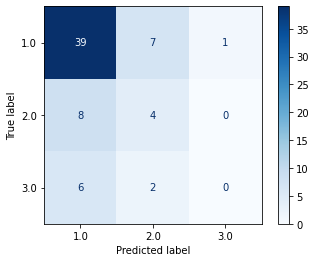

In [21]:
# Evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [25]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'i', 'p', 'm', 'i__n_jobs', 'i__remainder', 'i__sparse_threshold', 'i__transformer_weights', 'i__transformers', 'i__verbose', 'i__verbose_feature_names_out', 'i__num', 'i__cat', 'i__num__add_indicator', 'i__num__copy', 'i__num__fill_value', 'i__num__missing_values', 'i__num__strategy', 'i__num__verbose', 'i__cat__add_indicator', 'i__cat__copy', 'i__cat__fill_value', 'i__cat__missing_values', 'i__cat__strategy', 'i__cat__verbose', 'p__n_jobs', 'p__remainder', 'p__sparse_threshold', 'p__transformer_weights', 'p__transformers', 'p__verbose', 'p__verbose_feature_names_out', 'p__num', 'p__cat', 'p__num__clip', 'p__num__copy', 'p__num__feature_range', 'p__cat__categories', 'p__cat__drop', 'p__cat__dtype', 'p__cat__handle_unknown', 'p__cat__sparse', 'm__algorithm', 'm__leaf_size', 'm__metric', 'm__metric_params', 'm__n_jobs', 'm__n_neighbors', 'm__p', 'm__weights'])

$$[TO DO - Students]$$

>* Use GridSSearch or RandomizedSearch in order to find best hyper-parameters for imputing missing value, for data normalisation and for the hyper-parameters of Knn

In [40]:
# Find best hyperparameter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


parameters = {'m__n_neighbors': [3, 5, 7, 9],
              'm__weights': ['uniform', 'distance'],
              'm__p': [1, 2],
              'm__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'm__leaf_size': [10, 20, 30, 40]
              }

 
grid = GridSearchCV(pipeline, parameters, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train.values.ravel())
grid.best_params_, grid.best_score_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


({'m__algorithm': 'auto',
  'm__leaf_size': 10,
  'm__n_neighbors': 9,
  'm__p': 1,
  'm__weights': 'distance'},
 0.682090395480226)


Classification Report

              precision    recall  f1-score   support

     Class 1       0.80      0.83      0.81        47
     Class 2       0.38      0.50      0.43        12
     Class 3       0.50      0.12      0.20         8

    accuracy                           0.69        67
   macro avg       0.56      0.48      0.48        67
weighted avg       0.69      0.69      0.67        67



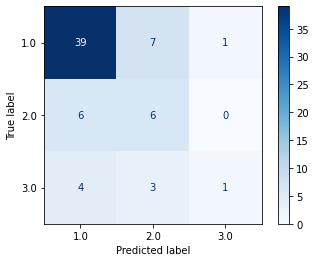

In [41]:
# Evaluate

best_pipeline = grid.best_estimator_
y_pred = best_pipeline.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

In [54]:
from sklearn.metrics import confusion_matrix

""" Using the confusion matrix, build your own classification report """
def my_classification_report(y_true, y_pred):
    print('Classification Report\n')
    print("            precision  recall  f1-score  support")
    cm = confusion_matrix(y_true, y_pred)
    classes = np.unique(y_true)
    for i, class_ in enumerate(classes):
      TP = cm[i, i]
      FN = cm[i, :].sum() - TP
      FP = cm[:, i].sum() - TP
      precision = TP / (TP + FP) if (TP + FP) else 0
      recall = TP / (TP + FN) if (TP + FN) else 0
      f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
      support = (y_true == class_).sum()
      print(f"{class_}     {precision:9.3f}    {recall:7.3f} {f1:7.3f} {support}")
      print("\n")
    
my_classification_report(y_test, y_pred)

Classification Report

            precision  recall  f1-score  support
1.0         0.796      0.830   0.812 V23    47
dtype: int64


2.0         0.375      0.500   0.429 V23    12
dtype: int64


3.0         0.500      0.125   0.200 V23    8
dtype: int64




## kNN from scratch - force brut

$$[TO DO - Students]$$
>* Read and Undestand the code

The **naive version** of the algorithm is easy to implement by calculating the distances between the test example and all stored examples, but it is computationally intensive for large training sets. __This is what we will do here.__

Using an **approximate nearest neighbor** search algorithm makes the k-NN faster to compute, even for large data sets. Many nearest neighbor search algorithms have been proposed over the years; they generally seek to reduce the number of distance evaluations actually performed.

### Define the dataset

In [55]:
# Define dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)

dataset = np.concatenate((X, y), axis=1)
train, test = train_test_split(dataset, test_size=.5, random_state=42)

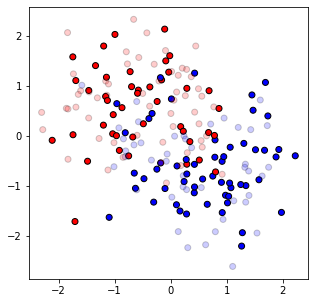

In [56]:
# Plot the training and testing points
plt.figure(figsize=(5, 5))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(train[:, 0], train[:, 1], c=train[:, -1], cmap=cm_bright, edgecolors='k')
plt.scatter(test[:, 0], test[:, 1], c=test[:, -1], cmap=cm_bright, edgecolors='k', alpha=0.2)
plt.show()

### Step 1: Calculate Euclidean Distance

In [59]:
# calculate the Euclidean distance between two vectors
from math import sqrt
 
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [60]:
# print distance between the first element of test set to the 10th first element of train
for row in train[:10]:
    distance = euclidean_distance(test[0,:-1], row[:-1])
    print(distance)

0.00886293919542891
1.045397591464741
1.350070676281334
0.6573564294853871
1.8215091152800857
2.031562341242025
2.2493859974292336
0.4132095942070787
2.328375325366197
1.3205541336786386


### Step 2: Get Nearest Neighbors

Neighbors for a new piece of data in the dataset are the k closest instances, as defined by our distance measure.

To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.

Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.

In [61]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [62]:
# Look at the 3 nearest neighbors from the first element of test set
neighbors = get_neighbors(train, test[0], 3)
for neighbor in neighbors:
    print(neighbor)

[ 1.51479055 -0.27369259  1.        ]
[ 1.57677596 -0.87449506  1.        ]
[ 0.9482417  -0.41261174  1.        ]


### Step 3: Make Predictions

The most similar neighbors collected from the training dataset can be used to make predictions.

In the case of classification, we can return the most represented class among the neighbors.

We can achieve this by performing the max() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the max() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.

Below is the function named predict_classification() that implements this.

In [63]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [64]:
for i in range(10):
    prediction = predict_classification(train, test[i], 3)
    print('Expected %d, Got %d.' % (test[i, -1], prediction))

Expected 1, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 0, Got 0.


### Cost of these approach

* n: number of points in the training dataset
* d: data dimensionality
* k: number of neighbors that we consider for voting


- Training time complexity: O(1)
- Prediction time complexity: O(k * n * d)

## Approximate Nearest Neighbors

$$[TO DO - Students]$$
>* read at least the first 2 papers


Try to understand ANN
* [KNN (K-Nearest Neighbors) is Dead!](https://pub.towardsai.net/knn-k-nearest-neighbors-is-dead-fc16507eb3e)
* [Comprehensive Guide To Approximate Nearest Neighbors Algorithms](https://towardsdatascience.com/comprehensive-guide-to-approximate-nearest-neighbors-algorithms-8b94f057d6b6)
* [Approximate Nearest Neighbor Search in High Dimensions](https://arxiv.org/abs/1806.09823)